<a href="https://colab.research.google.com/github/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/blob/main/exp1_2_fibonacci_recursive_ast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [3,022 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.

In [2]:
!sudo apt install python3.9

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,917 kB of archives.
After this operation, 19.1 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 libpython3.9-minimal amd64 3.9.15-1+bionic1 [805 kB]
Get:2 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main amd64 python3.9-minimal amd64 3.9.15-1+bionic1 [1,938 kB]
Get:3 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic/main am

In [3]:
!python3.9 -V

Python 3.9.15


In [4]:
!which python3.9

/usr/bin/python3.9


#**i. Colab hardware and software specs:**
- n1-highmem-2 instance

- 2vCPU @ 2.3GHz

- 13GB RAM

- 100GB Free Space

- idle cut-off 90 minutes

- maximum lifetime 12 hours

In [5]:
# Colab hardware info (processor and memory):
# !cat /proc/cpuinfo
# !cat /proc/memoinfo
# !lscpu
!lscpu | egrep 'Model name|Socket|Thread|NUMA|CPU\(s\)'
print("---------------------------------")
!free -m

CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Socket(s):           1
NUMA node(s):        1
Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
NUMA node0 CPU(s):   0,1
---------------------------------
              total        used        free      shared  buff/cache   available
Mem:          12985         814       10145           1        2025       11945
Swap:             0           0           0


In [6]:
# Colab SO structure and version
!ls -a
print("---------------------------------")
!ls -l /
print("---------------------------------")
!lsb_release -a

.  ..  .config	sample_data
---------------------------------
total 112
drwxr-xr-x   1 root root  4096 Oct 17 13:34 bin
drwxr-xr-x   2 root root  4096 Apr 24  2018 boot
drwxr-xr-x   1 root root  4096 Oct 17 13:44 content
drwxr-xr-x   1 root root  4096 Oct 17 13:58 datalab
drwxr-xr-x   5 root root   360 Oct 19 02:00 dev
drwxr-xr-x   1 root root  4096 Oct 19 02:01 etc
drwxr-xr-x   2 root root  4096 Apr 24  2018 home
drwxr-xr-x   1 root root  4096 Oct 17 13:36 lib
drwxr-xr-x   2 root root  4096 Oct 17 13:31 lib32
drwxr-xr-x   2 root root  4096 May 31 11:55 lib64
drwxr-xr-x   2 root root  4096 May 31 11:54 media
drwxr-xr-x   2 root root  4096 May 31 11:54 mnt
-rw-r--r--   1 root root 16047 Jul 11 20:48 NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   1 root root  4096 Oct 17 13:59 opt
dr-xr-xr-x 181 root root     0 Oct 19 02:00 proc
drwxr-xr-x  14 root root  4096 Oct 17 13:37 python-apt
drwx------   1 root root  4096 Oct 17 13:59 root
drwxr-xr-x   1 root root  4096 Oct 17 13:34 run
drwxr-xr-x   1 root

#**ii. Cloning IntPy repository:**
- https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept 

In [7]:
!git clone https://github.com/claytonchagas/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept

Cloning into '1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 33 (delta 7), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [8]:
%cd 1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept/
!ls -a

/content/1-speedup-sci-exp-research-intpy-first-ten-experiments-proofs-of-concept
.			     exp3_power.py		exp8_digital_rads
..			     exp4_quicksort_fixed.py	exp9_vince_sim.py
exp10_qho-2-electrons	     exp5_quicksort_random.py	.git
exp1_fibonacci_recursive.py  exp6_heat_distribution_lu	README.md
exp2_fibonacci_iterative.py  exp7_heap_permutation.py	stats_colab.py



- https://github.com/claytonchagas/intpy_dev.git

In [9]:
!git clone https://github.com/claytonchagas/intpy_dev.git

Cloning into 'intpy_dev'...
remote: Enumerating objects: 969, done.
remote: Total 969 (delta 0), reused 0 (delta 0), pack-reused 969
Receiving objects: 100% (969/969), 24.64 MiB | 17.98 MiB/s, done.
Resolving deltas: 100% (691/691), done.


In [10]:
!cp -r intpy_dev/intpy/ ./
!ls -a

.			     exp4_quicksort_fixed.py	.git
..			     exp5_quicksort_random.py	intpy
exp10_qho-2-electrons	     exp6_heat_distribution_lu	intpy_dev
exp1_fibonacci_recursive.py  exp7_heap_permutation.py	README.md
exp2_fibonacci_iterative.py  exp8_digital_rads		stats_colab.py
exp3_power.py		     exp9_vince_sim.py


In [11]:
!git branch
print("---------------------------------")
#!git log --pretty=oneline --abbrev-commit
#!git log --all --decorate --oneline --graph 

* main
---------------------------------


#**iii. Fibonacci's evolutions and cutoff by approach**

- Evaluating recursive fibonacci code and its cutoff by approach

In [12]:
!ls -a
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iii.dat
print("--no-cache execution")
!for i in {1..37}; do python3.9 exp1_fibonacci_recursive.py $i --no-cache >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("only intra cache")
!for i in {1..37}; do python3.9 exp1_fibonacci_recursive.py $i -v v01x >> output_iii.dat; rm -rf .intpy; done
print("done!")
print("full cache")
!for i in {1..37}; do python3.9 exp1_fibonacci_recursive.py $i -v v01x >> output_iii.dat; done
print("done!")

.			     exp4_quicksort_fixed.py	.git
..			     exp5_quicksort_random.py	intpy
exp10_qho-2-electrons	     exp6_heat_distribution_lu	intpy_dev
exp1_fibonacci_recursive.py  exp7_heap_permutation.py	README.md
exp2_fibonacci_iterative.py  exp8_digital_rads		stats_colab.py
exp3_power.py		     exp9_vince_sim.py
---------------------------------
Cleaning up cache
--no-cache execution
done!
only intra cache
done!
full cache
done!


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.002, 0.004, 0.006, 0.009, 0.036, 0.04, 0.042, 0.065, 0.105, 0.169, 0.285, 0.438, 0.728, 1.156, 1.888, 3.055, 4.886, 8.333]
[0.021, 0.032, 0.038, 0.047, 0.057, 0.065, 0.104, 0.09, 0.104, 0.098, 0.108, 0.131, 0.125, 0.137, 0.135, 0.154, 0.17, 0.174, 0.18, 0.208, 0.206, 0.21, 0.217, 0.232, 0.248, 0.267, 0.257, 0.296, 0.291, 0.32, 0.312, 0.309, 0.307, 0.327, 0.352, 0.368, 0.358]
[0.011, 0.018, 0.012, 0.011, 0.011, 0.01, 0.01, 0.011, 0.01, 0.011, 0.011, 0.01, 0.012, 0.01, 0.011, 0.011, 0.011, 0.01, 0.01, 0.01, 0.011, 0.011, 0.011, 0.011, 0.011, 0.011, 0.012, 0.012, 0.011, 0.013, 0.011, 0.011, 0.011, 0.012, 0.011, 0.011, 0.01]


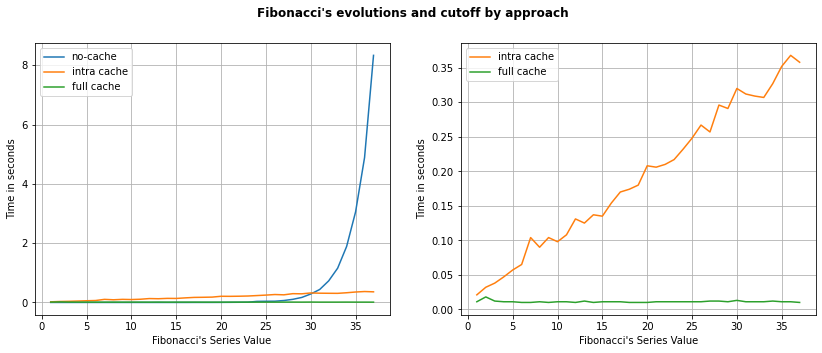

In [13]:
import matplotlib.pyplot as plt
import numpy as np

f1 = open("output_iii.dat", "r")
data1 = []
dataf1 = []
for x in f1.readlines()[3:148:4]:
  data1.append(float(x))
f1.close()
for datas1 in data1:
  dataf1.append(round(datas1, 3))
print(dataf1)

f2 = open("output_iii.dat", "r")
data2 = []
dataf2 = []
for x in f2.readlines()[151:296:4]:
  data2.append(float(x))
f2.close()
for datas2 in data2:
  dataf2.append(round(datas2, 3))
print(dataf2)

f3 = open("output_iii.dat", "r")
data3 = []
dataf3 = []
for x in f3.readlines()[299:444:4]:
  data3.append(float(x))
f3.close()
for datas3 in data3:
  dataf3.append(round(datas3, 3))
print(dataf3)

x = np.arange(1,38)

#plt.style.use('classic')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)
fig.suptitle("Fibonacci's evolutions and cutoff by approach", fontweight='bold')
ax1.plot(x, dataf1, "tab:blue", label="no-cache")
ax1.plot(x, dataf2, "tab:orange", label="intra cache")
ax1.plot(x, dataf3, "tab:green", label="full cache")
#ax1.set_title("Fibonacci's evolutions and cutoff by approach")
ax1.set_xlabel("Fibonacci's Series Value")
ax1.set_ylabel("Time in seconds")
ax1.grid()
lex = ax1.legend()

ax2.plot(x, dataf2, "tab:orange", label="intra cache")
ax2.plot(x, dataf3, "tab:green", label="full cache")
#ax2.set_title("Quicksort's random evolutions and cutoff by approach")
ax2.set_xlabel("Fibonacci's Series Value")
ax2.set_ylabel("Time in seconds")
ax2.grid()
lex = ax2.legend()

plt.show()

#**iv. Fibonacci 200, 100 and 50 recursive, three mixed trials**
- Evaluating recursive fibonacci code, input 200, 100, and 50, three trials and plot.
- First trial: input 200, 100, and 50, no inter-cache (baseline).
- Second trial: input 200, 100, and 50, with intra and inter-cache, analyzing the cache's behavior with different inputs.
- Third trial: input 50, 100, and 200, with intra and inter-cache, analyzing the cache's behavior with different inputs, in a different order of the previous running.

In [14]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
!rm -rf output_iv.dat
print("First running, Fibonacci 200: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 200 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Second running, Fibonacci 100: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 100 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("Third running, Fibonacci 50: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 50 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 200: value and time in sec
['v01x']
False
280571172992510140037611932413038677189525
2.011592830000012
---------------------------------
Cleaning up cache
Second running, Fibonacci 100: value and time in sec
['v01x']
False
354224848179261915075
0.9784626539999977
---------------------------------
Cleaning up cache
Third running, Fibonacci 50: value and time in sec
['v01x']
False
12586269025
0.4857093809999924
---------------------------------


- Second trial: with inter and intra-cache, inputs: 200, 100 and 50.

In [15]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Fibonacci 200: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 200 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Fibonacci 100: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 100 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Fibonacci 50: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 50 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 200: value and time in sec
['v01x']
False
280571172992510140037611932413038677189525
1.890245114999999
---------------------------------
Second running, Fibonacci 100: value and time in sec
['v01x']
False
354224848179261915075
0.001705262999990964
---------------------------------
Third running, Fibonacci 50: value and time in sec
['v01x']
False
12586269025
0.0017537230000073123
---------------------------------


\- Third trial: with inter and intra-cache, inputs: 50, 100 and 200.

In [16]:
print("---------------------------------")
print("Cleaning up cache")
!rm -rf .intpy
print("First running, Fibonacci 50: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 50 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Second running, Fibonacci 100: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 100 -v v01x | tee -a output_iv.dat
print("---------------------------------")
print("Third running, Fibonacci 200: value and time in sec")
!python3.9 exp1_fibonacci_recursive.py 200 -v v01x | tee -a output_iv.dat
print("---------------------------------")

---------------------------------
Cleaning up cache
First running, Fibonacci 50: value and time in sec
['v01x']
False
12586269025
0.457741182999996
---------------------------------
Second running, Fibonacci 100: value and time in sec
['v01x']
False
354224848179261915075
0.4581856249999987
---------------------------------
Third running, Fibonacci 200: value and time in sec
['v01x']
False
280571172992510140037611932413038677189525
0.9324704969999971
---------------------------------


- Plotting the comparison: first graph.

[2.011593, 0.978463, 0.485709, 1.890245, 0.001705, 0.001754, 0.457741, 0.458186, 0.93247]
[2.011593, 1.890245, 0.93247]
[0.978463, 0.001705, 0.458186]
[0.485709, 0.001754, 0.457741]


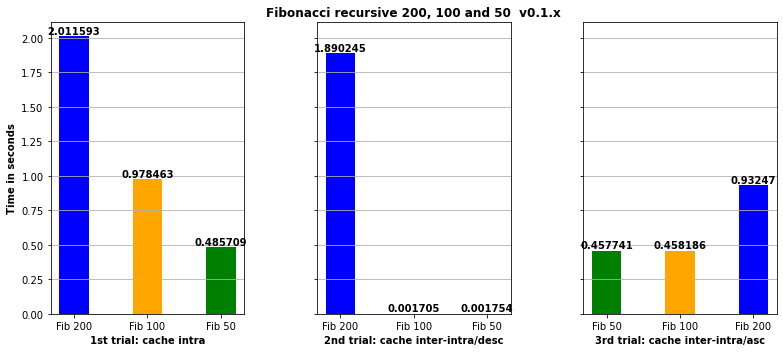

In [17]:
import numpy as np

f4 = open("output_iv.dat", "r")
fib200 = []
fib100 = []
fib50 = []
data4 = []
dataf4 = []
for x in f4.readlines()[3::4]:
  data4.append(float(x))
f4.close()

for datas4 in data4:
  dataf4.append(round(datas4, 6))

print(dataf4)

fib200 = [dataf4[0], dataf4[3], dataf4[8]]
print(fib200)

fib100 = [dataf4[1], dataf4[4], dataf4[7]]
print(fib100)

fib50 = [dataf4[2], dataf4[5], dataf4[6]]
print(fib50)

running3to5 = ['1st trial: cache intra', '2nd trial: cache inter-intra/desc', '3rd trial: cache inter-intra/asc']

y = np.arange(len(running3to5))
width = 0.40

z = ['Fib 200', 'Fib 100', 'Fib 50']
list_color_z = ['blue', 'orange', 'green']

zr = ['Fib 50', 'Fib 100', 'Fib 200']
list_color_zr = ['green', 'orange', 'blue']

t1=[dataf4[0], dataf4[1], dataf4[2]]
t2=[dataf4[3], dataf4[4], dataf4[5]]
t3=[dataf4[6], dataf4[7], dataf4[8]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(11,5))
rects1 = ax1.bar(z, t1,width, label='1st trial', color=list_color_z)
rects2 = ax2.bar(z, t2, width, label='2nd trial', color=list_color_z)
rects3 = ax3.bar(zr, t3, width, label='3rd trial', color=list_color_zr)

ax1.set_ylabel('Time in seconds', fontweight='bold')
ax1.set_xlabel('1st trial: cache intra', fontweight='bold')
ax2.set_xlabel('2nd trial: cache inter-intra/desc', fontweight='bold')
ax3.set_xlabel('3rd trial: cache inter-intra/asc', fontweight='bold')

ax2.set_title('Fibonacci recursive 200, 100 and 50  v0.1.x', fontweight='bold')

for index, datas in enumerate(t1):
  ax1.text(x=index, y=datas, s=t1[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t2):
  ax2.text(x=index, y=datas, s=t2[index], ha = 'center', va = 'bottom', fontweight='bold')

for index, datas in enumerate(t3):
  ax3.text(x=index, y=datas, s=t3[index], ha = 'center', va = 'bottom', fontweight='bold')

ax1.grid(axis='y')
ax2.grid(axis='y')
ax3.grid(axis='y')

fig.tight_layout()
plt.savefig('chart_iv_fib_50_100_200_v01x.png')
plt.show()

#**1. Fast execution, all versions (v0.1.x and from v0.2.1.x to v0.2.7.x)**

##**1.1 Fast execution: only intra-cache**

###**1.1.1 Fast execution: only intra-cache => experiment's executions**

In [18]:
!rm -rf .intpy;\
rm -rf stats_intra.dat;\
echo "IntPy only intra-cache";\
experimento=exp1_fibonacci_recursive.py;\
param=200;\
echo "Experiment: $experimento";\
echo "Params: $param";\
for i in v01x v021x v022x v023x v024x v025x v026x v027x;\
    do rm -rf output_intra_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        rm -rf .intpy;\
        python3.9 $experimento $param -v $i >> output_intra_$i.dat;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in v01x v021x v022x v023x v024x v025x v026x v027x;\
        do echo "Statistics version $k" >> stats_intra.dat;\
        echo "Statistics version $k";\
        python3.9 stats_colab.py output_intra_$k.dat;\
        python3.9 stats_colab.py output_intra_$k.dat >> stats_intra.dat;\
        echo "---------------------------------";\
done;

IntPy only intra-cache
Experiment: exp1_fibonacci_recursive.py
Params: 200
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
---------------------------------
IntPy version v023x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v023x
-------------------------------

###**1.1.2 Fast execution: only intra-cache => charts generation**

---




In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown']
filev = "f_intra_"
data = "data_intra_"
dataf = "dataf_intra_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_intra = open("output_intra_"+i+".dat", "r")
    data_intra = []
    dataf_intra = []
    for x in file_intra.readlines()[3::4]:
        data_intra.append(float(x))
    file_intra.close()
    #print(data_intra)
    for y in data_intra:
        dataf_intra.append(round(y, 5))
    print(i+": ",dataf_intra)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_intra, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_intra):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running only with intra cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" intra - Fibonacci 200 recursive - with intra cache, no inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_intra_"+i+".png")
    plt.close()
    #plt.show()

v01x:  [1.80173, 1.81319, 1.89785, 1.81242, 1.82851]
v021x:  [0.07531, 0.07886, 0.07833, 0.07939, 0.0811]
v022x:  [0.07392, 0.07569, 0.0759, 0.07313, 0.0821]
v023x:  [0.07102, 0.08655, 0.07079, 0.07424, 0.0748]
v024x:  [0.08338, 0.07357, 0.07758, 0.07861, 0.07184]
v025x:  [0.07396, 0.07149, 0.07304, 0.07109, 0.07208]
v026x:  [0.07512, 0.07376, 0.07468, 0.07768, 0.07772]
v027x:  [0.07908, 0.09012, 0.07874, 0.0823, 0.07523]


In [20]:
import matplotlib.pyplot as plt

file_intra = open("stats_intra.dat", "r")

data_intra = []

for x in file_intra.readlines()[5::8]:
    data_intra.append(round(float(x[8::]), 5))
file_intra.close()
print(data_intra)

versions = ["0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_intra, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_intra):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, intra cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Fibonacci 200 recursive, cache intra-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_intra.png')
plt.close()
#plt.show()

[1.81319, 0.07886, 0.07569, 0.07424, 0.07758, 0.07208, 0.07512, 0.07908]


##**1.2 Fast execution: full cache -> intra and inter-cache**

###**1.2.1 Fast execution: full cache -> intra and inter-cache => experiment's executions**

In [21]:
!rm -rf .intpy;\
rm -rf stats_full.dat;\
echo "IntPy full cache -> intra and inter-cache";\
experimento=exp1_fibonacci_recursive.py;\
param=200;\
echo "Experiment: $experimento";\
echo "Params: $param";\
for i in v01x v021x v022x v023x v024x v025x v026x v027x;\
    do rm -rf output_full_$i.dat;\
    rm -rf .intpy;\
    echo "---------------------------------";\
    echo "IntPy version $i";\
    for j in {1..5};\
        do echo "Execution $j";\
        python3.9 $experimento $param -v $i >> output_full_$i.dat;\
        echo "Done execution $j";\
    done;\
    echo "Done IntPy version $i";\
done;\
echo "---------------------------------";\
echo "---------------------------------";\
echo "Statistics evaluation:";\
for k in v01x v021x v022x v023x v024x v025x v026x v027x;\
        do echo "Statistics version $k" >> stats_full.dat;\
        echo "Statistics version $k";\
        python3.9 stats_colab.py output_full_$k.dat;\
        python3.9 stats_colab.py output_full_$k.dat >> stats_full.dat;\
        echo "---------------------------------";\
done;

IntPy full cache -> intra and inter-cache
Experiment: exp1_fibonacci_recursive.py
Params: 200
---------------------------------
IntPy version v01x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v01x
---------------------------------
IntPy version v021x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v021x
---------------------------------
IntPy version v022x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v022x
---------------------------------
IntPy version v023x
Execution 1
Done execution 1
Execution 2
Done execution 2
Execution 3
Done execution 3
Execution 4
Done execution 4
Execution 5
Done execution 5
Done IntPy version v023x
------------

###**1.2.2 Fast execution: full cache -> intra and inter-cache => charts generation**

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

versions = ['v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown']
filev = "f_full_"
data = "data_full_"
dataf = "dataf_full_"

for i, j in zip(versions, colors):
    filev_version = filev+i
    data_version = data+i
    dataf_version = dataf+i

    file_full = open("output_full_"+i+".dat", "r")
    data_full = []
    dataf_full = []
    for x in file_full.readlines()[3::4]:
        data_full.append(float(x))
    file_full.close()
    for y in data_full:
        dataf_full.append(round(y, 5))
    print(i+": ",dataf_full)
    running1_1 = ['1st', '2nd', '3rd', '4th', '5th']
 
    plt.figure(figsize = (10, 5))
    plt.bar(running1_1, dataf_full, color =j, width = 0.4)
    plt.grid(axis='y')

    for index, datas in enumerate(dataf_full):
        plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')

    plt.xlabel("Running full cache "+i, fontweight='bold')
    plt.ylabel("Time in seconds", fontweight='bold')
    plt.title("Chart "+i+" full - Fibonacci 200 recursive - with intra and inter cache - IntPy "+i+" version", fontweight='bold')
    plt.savefig("chart_full_"+i+".png")
    plt.close()
    #plt.show()

v01x:  [1.91208, 0.00179, 0.00233, 0.0017, 0.00163]
v021x:  [0.08072, 0.0017, 0.00154, 0.00159, 0.00152]
v022x:  [0.07185, 0.02952, 0.03015, 0.03067, 0.0317]
v023x:  [0.0737, 0.00152, 0.00147, 0.00156, 0.00142]
v024x:  [0.07992, 0.09912, 0.09175, 0.08961, 0.09071]
v025x:  [0.08263, 0.00491, 0.00458, 0.00452, 0.0046]
v026x:  [0.07772, 0.00217, 0.0022, 0.00218, 0.00235]
v027x:  [0.08613, 0.00164, 0.00157, 0.00164, 0.00155]


In [23]:
import matplotlib.pyplot as plt

file_full = open("stats_full.dat", "r")

data_full = []

for x in file_full.readlines()[5::8]:
    data_full.append(round(float(x[8::]), 5))
file_full.close()
print(data_full)

versions = ["0.1.x", "0.2.1.x", "0.2.2.x", "0.2.3.x", "0.2.4.x", "0.2.5.x", "0.2.6.x", "0.2.7.x"]

#colors =['royalblue', 'forestgreen', 'orangered', 'purple', 'skyblue', 'lime', 'lightgrey', 'tan']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple', 'tab:grey', 'tab:olive', 'tab:cyan', 'tab:brown']

plt.figure(figsize = (10, 5))
plt.bar(versions, data_full, color = colors, width = 0.7)
plt.grid(axis='y')

for index, datas in enumerate(data_full):
    plt.text(x=index, y=datas, s=datas, ha = 'center', va = 'bottom', fontweight='bold')
  
plt.xlabel("Median for 5 executions in each version, full cache", fontweight='bold')
plt.ylabel("Time in seconds", fontweight='bold')
plt.title("Fibonacci 200 recursive, cache intra and inter-running, comparison of all versions", fontweight='bold')
plt.savefig('compare_median_full.png')
plt.close()
#plt.show()

[0.00179, 0.00159, 0.03067, 0.00152, 0.09071, 0.0046, 0.0022, 0.00164]


##**1.3 Displaying charts to all versions**

###**1.3.1 Only intra-cache charts**

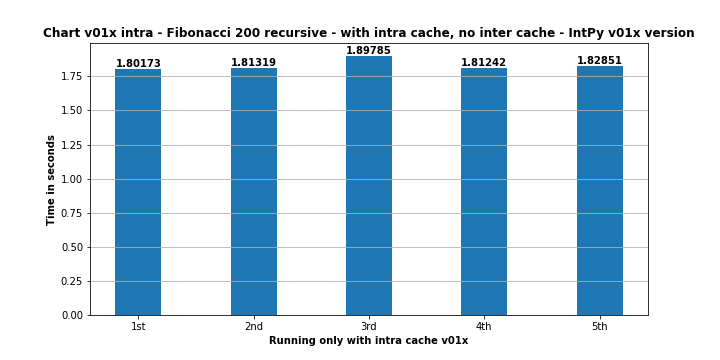

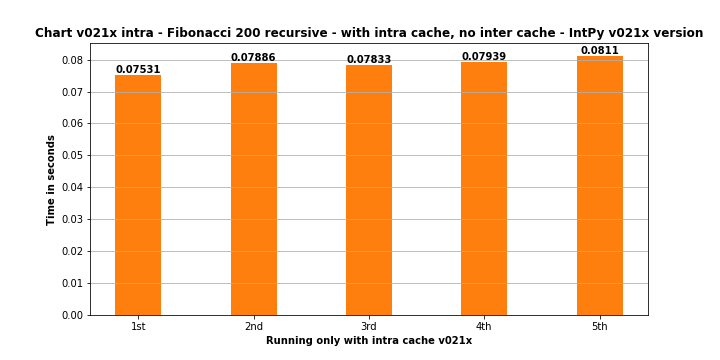

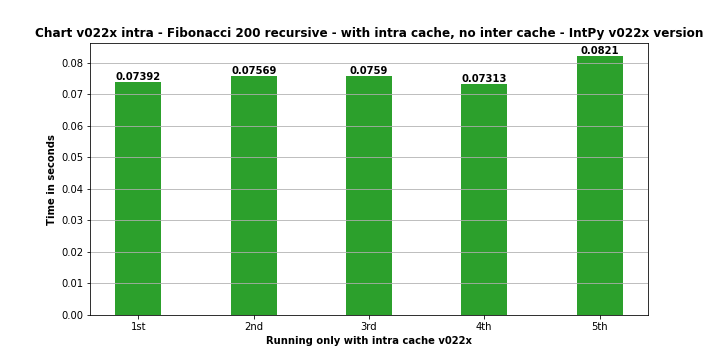

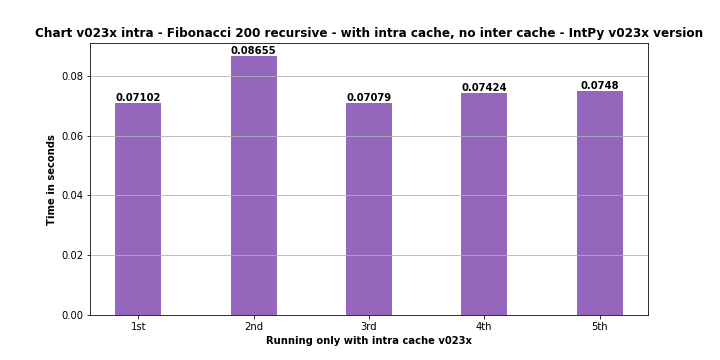

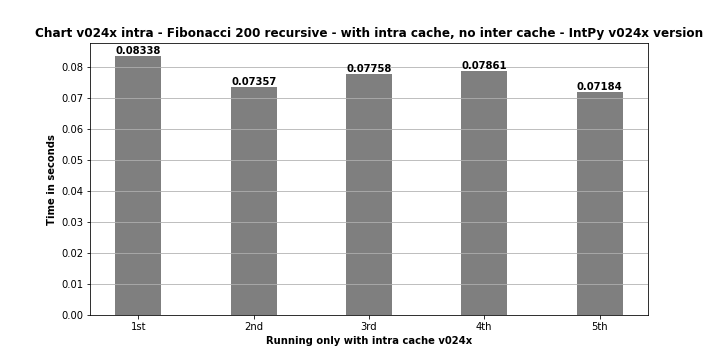

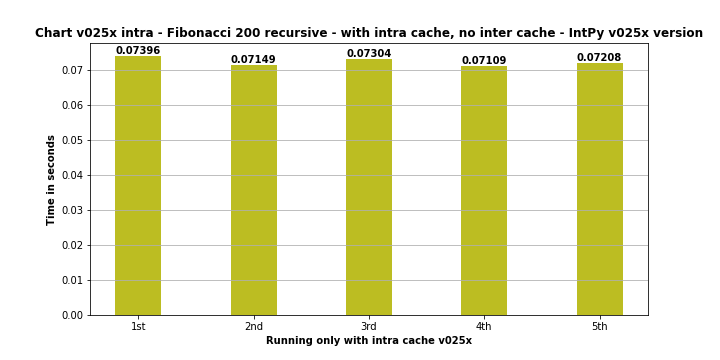

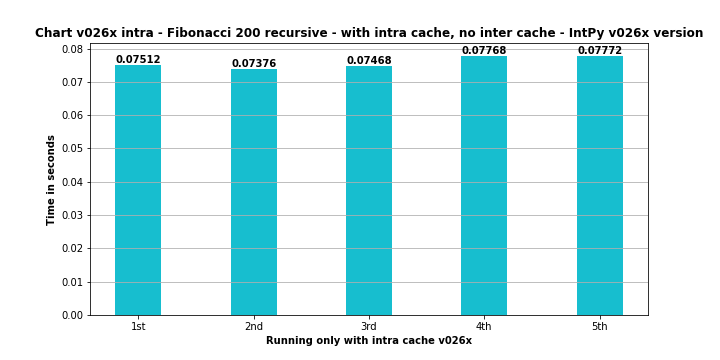

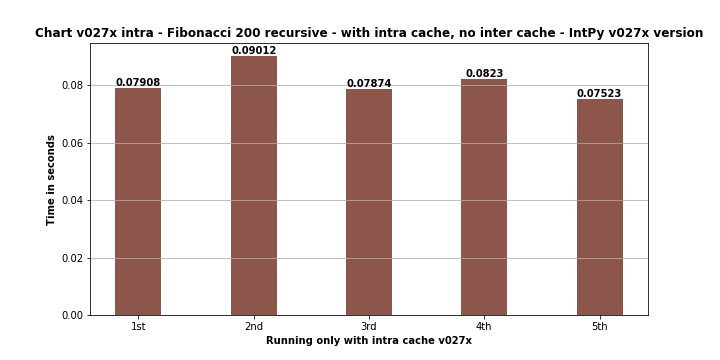

In [24]:
versions = ['v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_intra_"+i+".png"))
    print("=====================================================================================")

###**1.3.2 Full cache charts -> intra and inter-cache**

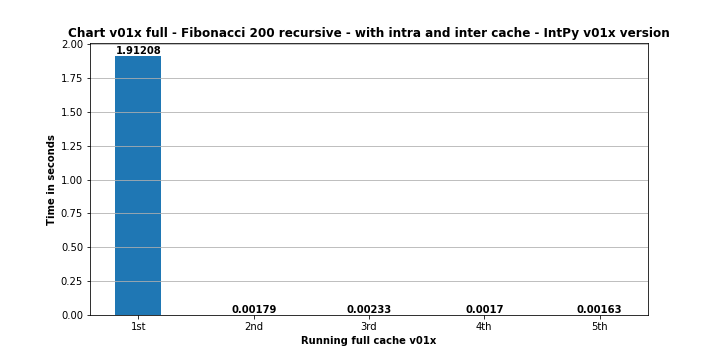

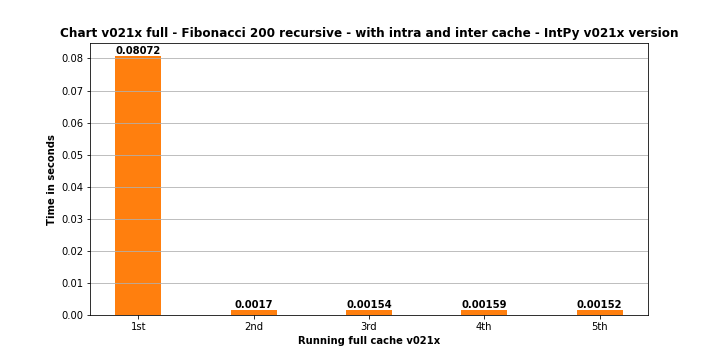

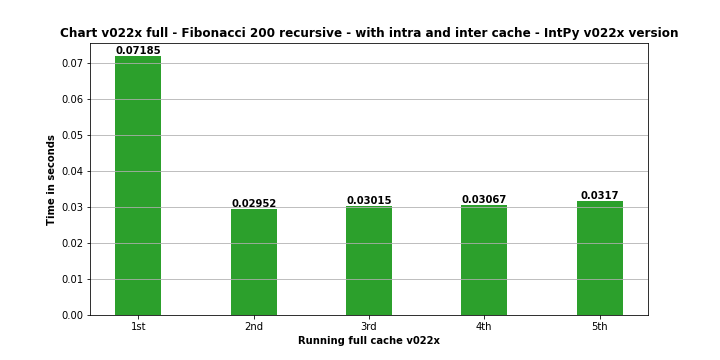

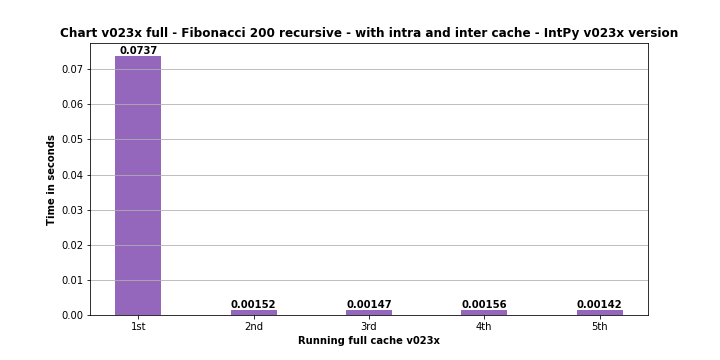

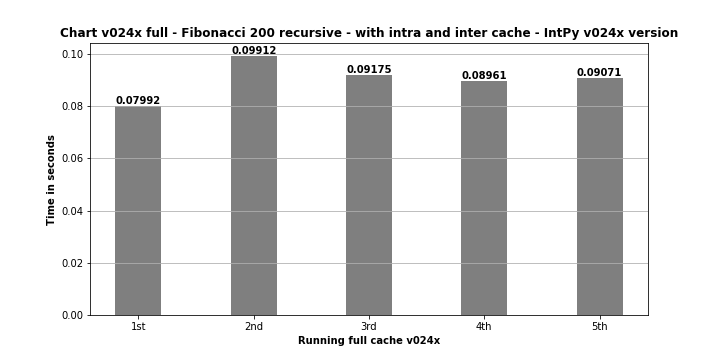

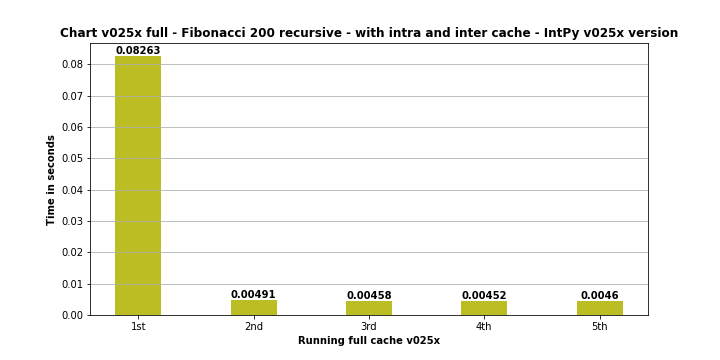

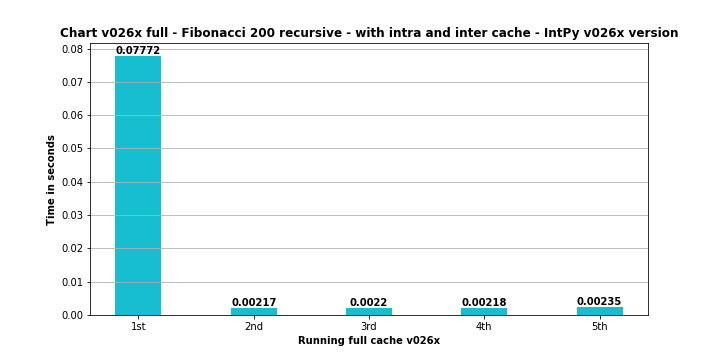

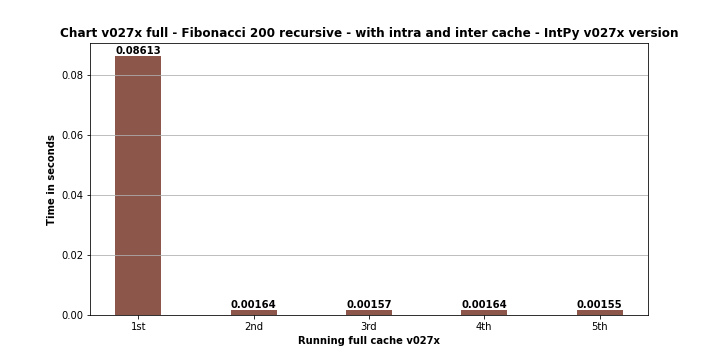

In [25]:
versions = ['v01x', 'v021x', 'v022x', 'v023x', 'v024x', 'v025x', 'v026x', 'v027x']

from IPython.display import Image, display

for i in versions:
    display(Image("chart_full_"+i+".png"))
    print("=====================================================================================")

###**1.3.3 Only intra-cache: median comparison chart of all versions**

---



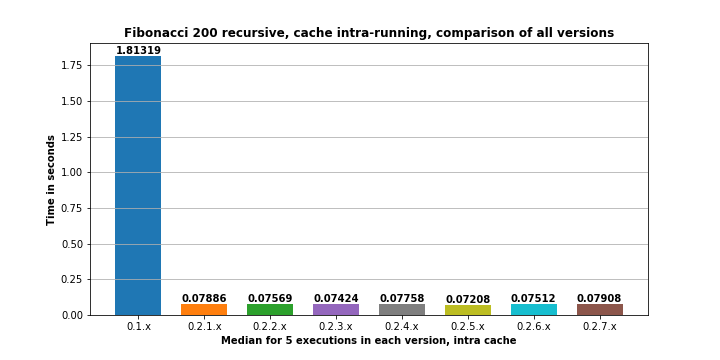

In [26]:
from IPython.display import Image, display
display(Image("compare_median_intra.png"))

###**1.3.4 Full cache -> intra and inter-cache: median comparison chart of all versions**

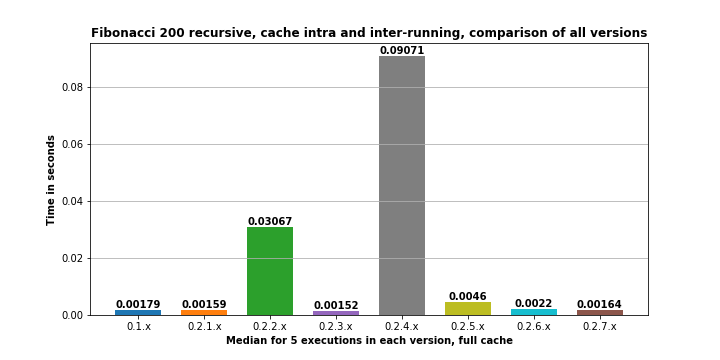

In [27]:
from IPython.display import Image, display
display(Image("compare_median_full.png"))

###**1.3.5 IntPy Fibonacci 50 - raw execution OK (no cache): 1h31min15sec**

2022-10-19 02:06:24 URL:https://raw.githubusercontent.com/claytonchagas/intpy_prod/main/intpy_raw_50_1h31m15s_ok.jpg [68757/68757] -> "intpy_raw_50_1h31m15s_ok.jpg" [1]


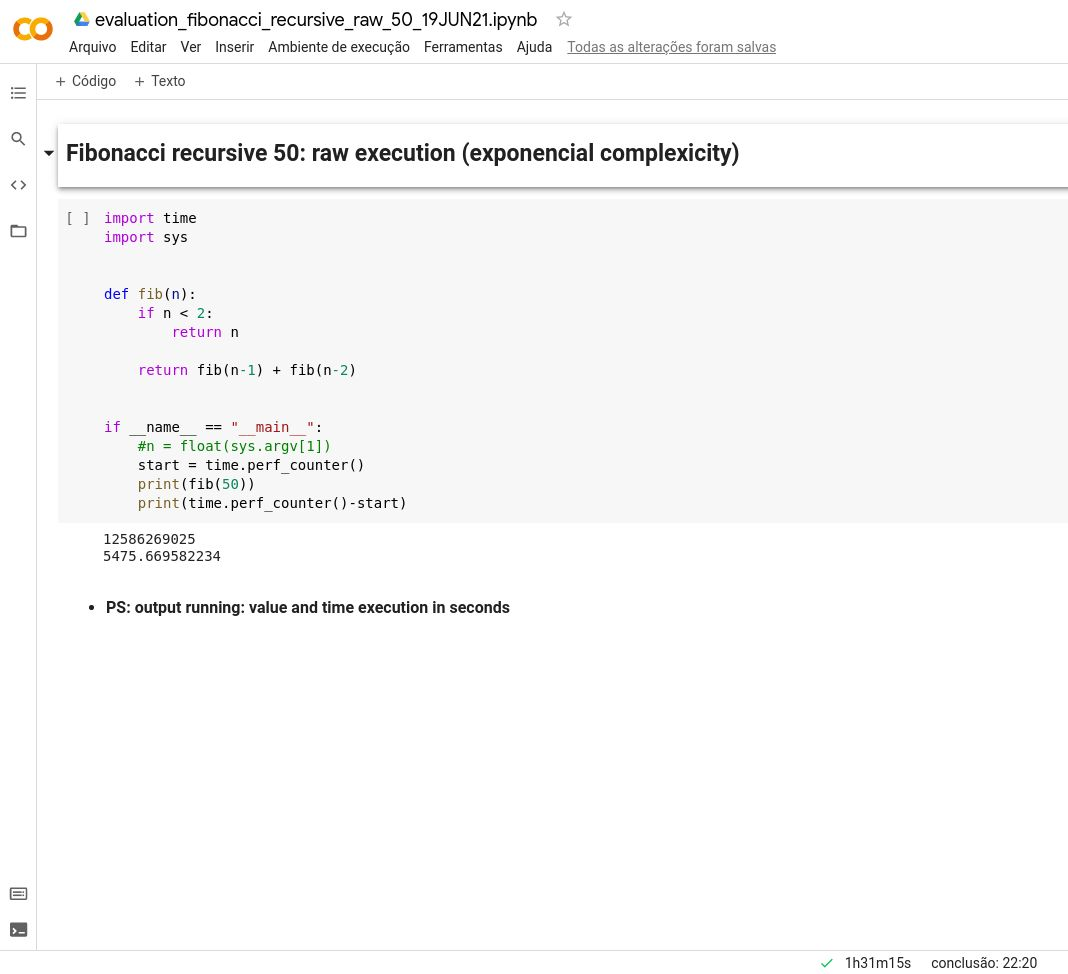

In [28]:
!wget -nv https://github.com/claytonchagas/intpy_prod/raw/main/intpy_raw_50_1h31m15s_ok.jpg
from IPython.display import Image, display
display(Image("intpy_raw_50_1h31m15s_ok.jpg", width=720))

###**1.3.6 IntPy Fibonacci 100 - raw execution NO OK (no cache): 14h43min30sec**

2022-10-19 02:06:28 URL:https://raw.githubusercontent.com/claytonchagas/intpy_prod/main/intpy_raw_100_14h43m30s_NO_ok.jpg [67582/67582] -> "intpy_raw_100_14h43m30s_NO_ok.jpg" [1]


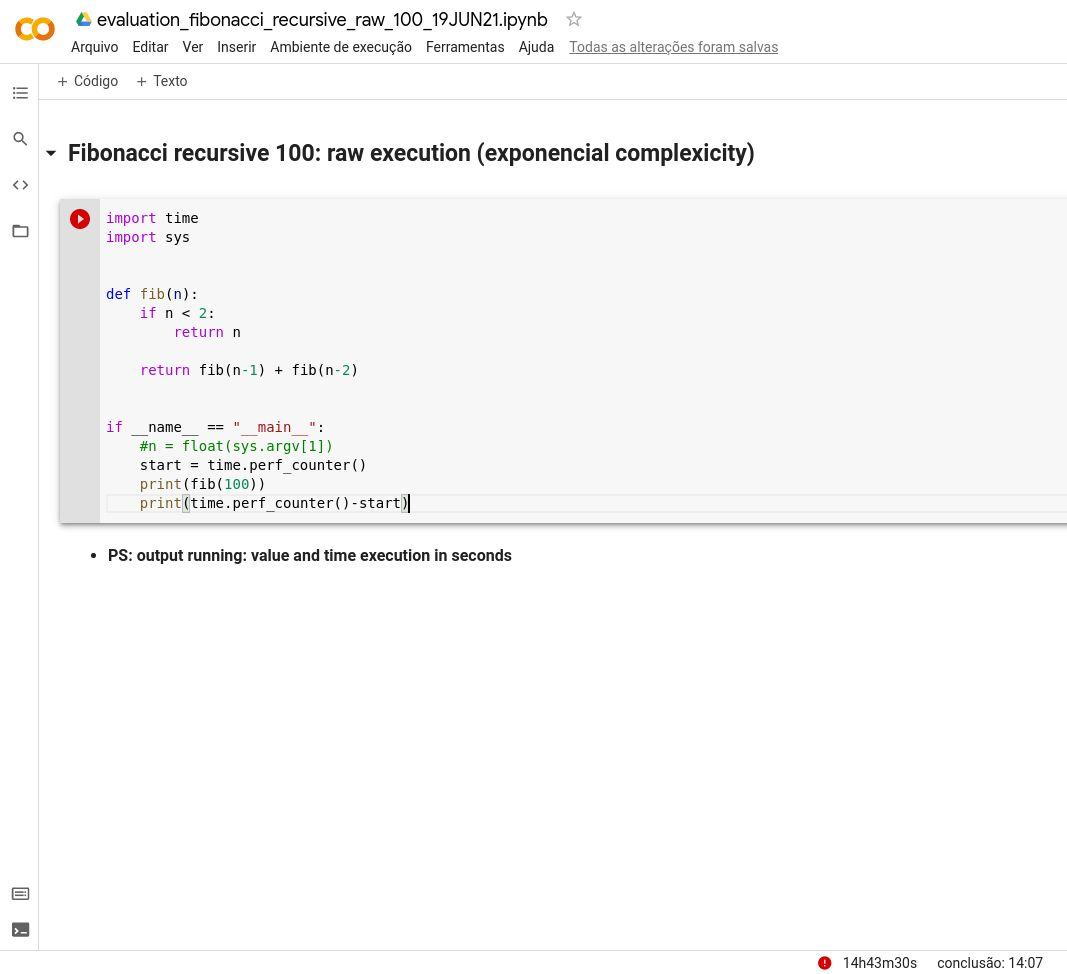

In [29]:
!wget -nv https://github.com/claytonchagas/intpy_prod/raw/main/intpy_raw_100_14h43m30s_NO_ok.jpg
from IPython.display import Image, display
display(Image("intpy_raw_100_14h43m30s_NO_ok.jpg", width=720))

###**1.3.6 IntPy Fibonacci 200 - no execution (no cache): inf**

2022-10-19 02:06:33 URL:https://raw.githubusercontent.com/claytonchagas/intpy_prod/main/intpy_raw_200_NO_exec_inf.jpg [65325/65325] -> "intpy_raw_200_NO_exec_inf.jpg" [1]


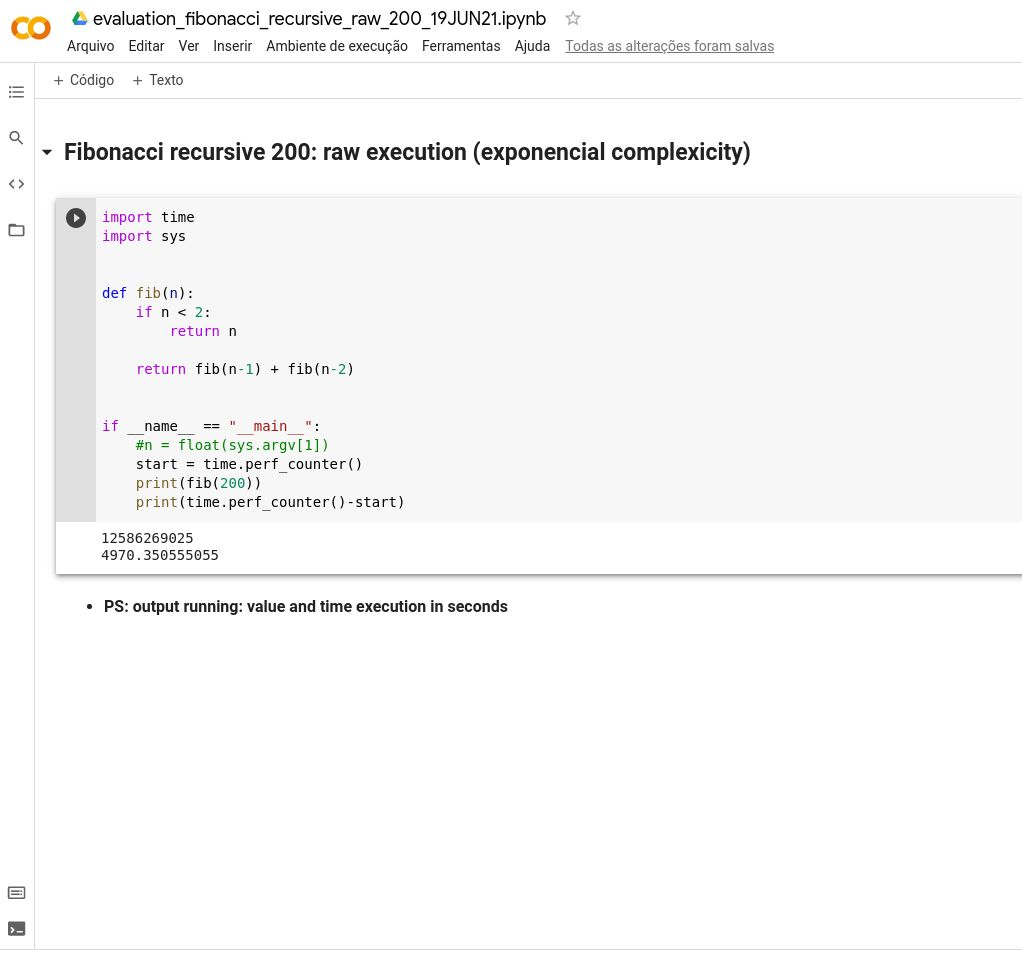

In [30]:
!wget -nv https://github.com/claytonchagas/intpy_prod/raw/main/intpy_raw_200_NO_exec_inf.jpg
from IPython.display import Image, display
display(Image("intpy_raw_200_NO_exec_inf.jpg", width=720))